# Insitu Clustering
https://www.youtube.com/watch?v=PX5nSBGB5Tw&t=29s

In [2]:
library(tidyverse)
library(DataExplorer)
library(grid)
library(gridExtra)
library(ggpubr)
library(viridis)
library(readxl)
library(ggrepel)
library(magrittr)
options(repr.plot.width=6, repr.plot.height=4,repr.plot.res =300)

In [3]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "3"

$minor
[1] "6.1"

$year
[1] "2019"

$month
[1] "07"

$day
[1] "05"

$`svn rev`
[1] "76782"

$language
[1] "R"

$version.string
[1] "R version 3.6.1 (2019-07-05)"

$nickname
[1] "Action of the Toes"

In [5]:
df <- read.csv("facility_2015_2019_v2.csv")
head(df)

,Year,ProductionMonth,UID,CondINJ,Flare,Fuel,FuelINJ,GasConfidential,Method,Oil,Operation,Operator,Region,SOR,Scheme,SolutionGas,SteamINJ,Vent
,<int>,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
1,2018,2018-04,17,NA,18.3,4552,NA,321.7,CSS,5217,CNULPR,Canadian Natural Upgrading Limited,Peace River,7.587402,PeaceRiver,551.3,39581.2,NA
2,2015,2015-02,16,NA,112.3,10040,NA,NA,SAGD,5331,PGFLB,Pengrowth,Cold Lake,22.289203,Lindbergh,1276.2,118828.2,NA
3,2019,2019-07,17,NA,59.1,6586,NA,314.7,CSS,5376,CNULPR,Canadian Natural Upgrading Limited,Peace River,13.804461,PeaceRiver,768.3,74211.4,NA
4,2018,2018-11,17,NA,4.9,7756,NA,401.4,CSS,6567,CNULPR,Canadian Natural Upgrading Limited,Peace River,11.913395,PeaceRiver,1141.7,78230.5,NA
5,2015,2015-04,8,NA,16.1,16148,NA,NA,SAGD,7803,HSESR,Husky,Athabasca,23.503505,Sunrise,117.4,183395.5,NA
6,2019,2019-01,17,NA,4.6,7751,NA,349.0,CSS,8064,CNULPR,Canadian Natural Upgrading Limited,Peace River,8.817989,PeaceRiver,921.4,71106.5,NA


In [6]:
df_clustering <- df %>% select(Oil,SteamINJ,SolutionGas,Method,Region)
head(df_clustering)

,Oil,SteamINJ,SolutionGas,Method,Region
,<int>,<fct>,<dbl>,<fct>,<fct>
1,5217,39581.2,551.3,CSS,Peace River
2,5331,118828.2,1276.2,SAGD,Cold Lake
3,5376,74211.4,768.3,CSS,Peace River
4,6567,78230.5,1141.7,CSS,Peace River
5,7803,183395.5,117.4,SAGD,Athabasca
6,8064,71106.5,921.4,CSS,Peace River


In [10]:
df_clustering$Oil <- as.numeric(df_clustering$Oil)
df_clustering$SteamINJ <- as.numeric(df_clustering$SteamINJ)
df_clustering$SolutionGas <- as.numeric(df_clustering$SolutionGas)

In [11]:
sum(is.na(df_clustering))

[1] 0

In [12]:
cluster_feature <- df_clustering[,1:3]
head(cluster_feature)

,Oil,SteamINJ,SolutionGas
,<dbl>,<dbl>,<dbl>
1,5217,860,551.3
2,5331,46,1276.2
3,5376,1050,768.3
4,6567,1067,1141.7
5,7803,283,117.4
6,8064,1040,921.4


In [13]:
# Scale data
feature_scale <- scale(cluster_feature)
head(feature_scale)

Oil,SteamINJ,SolutionGas
-0.9708361,0.9094228,-0.5856261
-0.9704683,-1.5914899,-0.5134744
-0.9703232,1.4931739,-0.5640274
-0.9664812,1.5454042,-0.5268616
-0.9624940,-0.8633372,-0.6288137
-0.9616521,1.4624501,-0.5487888


In [15]:
summary(feature_scale)

      Oil             SteamINJ        SolutionGas      
 Min.   :-0.9708   Min.   :-1.7297   Min.   :-0.63884  
 1st Qu.:-0.7723   1st Qu.:-0.8649   1st Qu.:-0.56427  
 Median :-0.4695   Median : 0.0000   Median :-0.47203  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.8443   3rd Qu.: 0.8649   3rd Qu.: 0.02484  
 Max.   : 2.7156   Max.   : 1.7297   Max.   : 4.16329  

In [16]:
fitK <- kmeans(feature_scale,3)
fitK

K-means clustering with 3 clusters of sizes 146, 442, 539

Cluster means:
        Oil   SteamINJ SolutionGas
1  1.517117 -0.1054498   2.2253555
2  0.214442 -0.9473131  -0.1264325
3 -0.586795  0.8053953  -0.4991072

Clustering vector:
   [1] 3 2 3 3 2 3 2 2 3 2 3 2 2 2 3 2 2 3 2 2 2 3 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2
  [38] 2 2 2 2 2 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 3 3 3 2 3 2 3 3 3 3 3 2 2 2 2 2 2 2 2 3 2 2 3 2 3 2 2 2 2 2
 [112] 3 3 2 2 2 2 2 2 2 2 3 3 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 3 3 2 2 3 2 2 2 2 2
 [149] 2 2 2 3 2 2 2 2 2 2 2 2 3 3 2 2 3 3 2 2 3 3 2 2 3 2 3 2 2 2 2 3 2 2 2 2 2
 [186] 3 2 2 3 2 2 3 3 3 2 3 2 3 2 3 3 2 3 3 3 2 3 2 2 2 3 3 3 3 3 2 3 3 3 3 3 3
 [223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 2
 [260] 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 2 2 3 3 2 2 2 2 2 2 3 2 2 3 2 2 2 2 3
 [297] 2 3 2 2 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 2 2 2 3 3 3 2 3 2 2 3 3 3 2 3 3 3
 [334] 3 3 3 2 2 2 3 3 3 3 2 3 3 3 3 

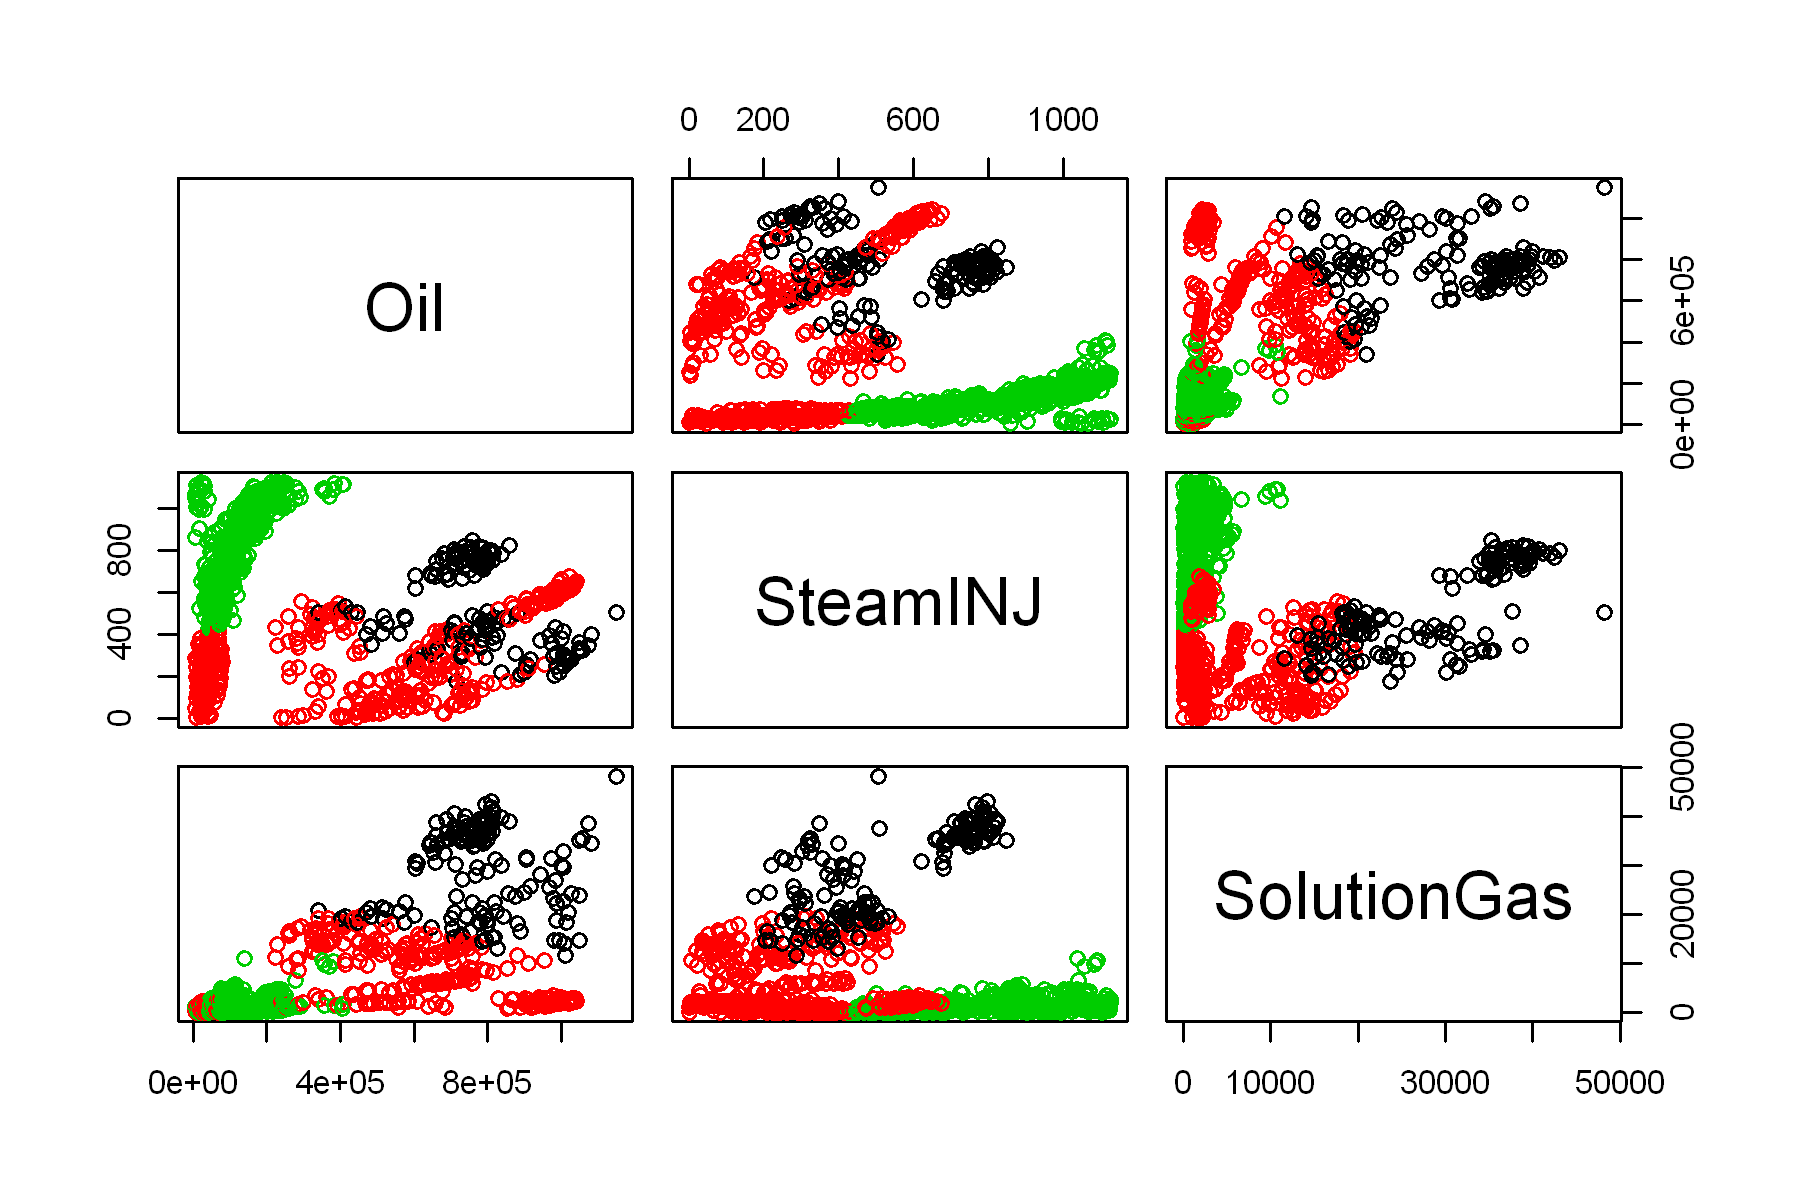

In [19]:
plot(df_clustering[,-(4:5)],col=fitK$cluster)

In [23]:
# Try different k
k <- list()
for(i in 1:20){
  k[[i]] <- kmeans(feature_scale, i)
}


In [24]:
k

[[1]]
K-means clustering with 1 clusters of sizes 1127

Cluster means:
           Oil     SteamINJ   SolutionGas
1 2.088441e-17 1.834774e-16 -1.922942e-16

Clustering vector:
   [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 1 1 1 1 

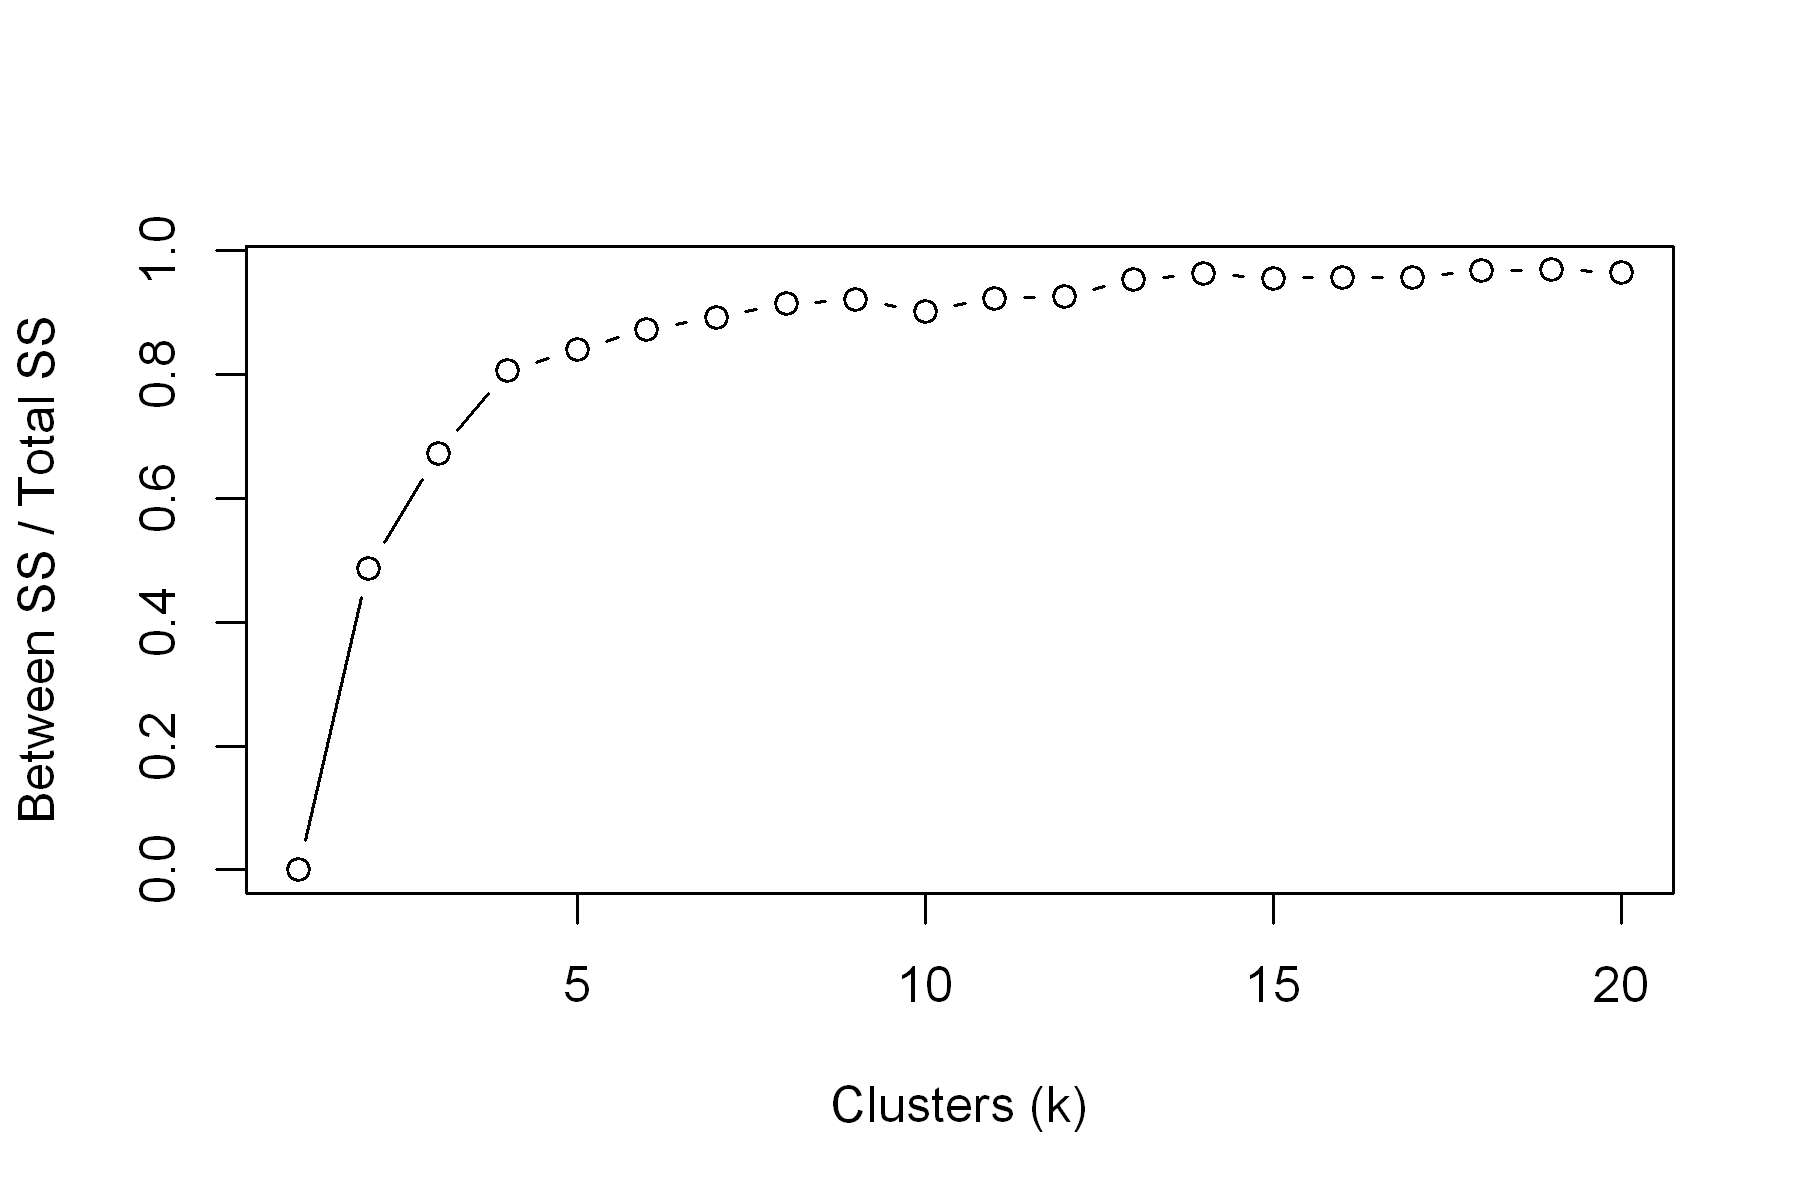

In [26]:
# Between Sum of square, total sum of square
betweenss_totss <- list()
for(i in 1:20){
  betweenss_totss[[i]] <- k[[i]]$betweenss/k[[i]]$totss
}

plot(1:20, betweenss_totss, type = "b", 
     ylab = "Between SS / Total SS", xlab = "Clusters (k)")